In [1]:
import seaborn as sns
import scipy
import skimage
sns.set_style("ticks")
from pathlib import Path

# Get the data 

In [61]:
# in this file is the url to the spreadsheet with the data
# PIGLEG_SPREADSHEET_URL=https://docs.google.com/spreadsheets/d/1G55kXxcJ0...piLaK0snddRU-jzU/edit?usp=sharing
env_paths = list(Path(".").glob("../**/.env.dev"))
print(env_paths)
# find line with PIGLEG_SPREADSHEET_URL and give me the value after the "="
PIGLEG_SPREADSHEET_URL = [line.split("=", 1)[1].strip() for line in open(env_paths[0], "r") if line.startswith("PIGLEG_SPREADSHEET_URL")][0]
PIGLEG_SPREADSHEET_URL = PIGLEG_SPREADSHEET_URL.replace("\"", "")
PIGLEG_SPREADSHEET_URL = PIGLEG_SPREADSHEET_URL.replace("edit?usp=sharing", "export?format=csv")
# PIGLEG_SPREADSHEET_URL

[WindowsPath('../.env.dev')]


In [118]:
import pandas as pd
url = PIGLEG_SPREADSHEET_URL
df = pd.read_csv(url)

In [119]:
df.tail()

,filename,report_url,timestamp,email,uploaded_at,finished_at,fps,Needle holder length [m],Scissors length [m],Forceps length [m],...,Stitch 3 duration [s],Stitch 3 duration [%],Needle holder stitch 0 length [pix],Forceps stitch 0 length [pix],Scissors stitch 0 length [pix],Needle holder bbox stitch 0 length [pix],Forceps bbox stitch 0 length [pix],Scissors bbox stitch 0 length [pix],Left hand bbox stitch 0 length [pix],Right hand bbox stitch 0 length [pix]
944,Bad-2021_11_03_A_Noll_Alexander_Einzelknopfnah...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 09:23:34,khalatbari.sadaf@gmail.com,2022-07-07 17:08,2024-01-17 08:23,25.0,"9,503007304","0,5081350784","1,944407215",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
945,Good-03_11_2021_B_Holzmu_ller_Katharina_Einzel...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 09:26:38,khalatbari.sadaf@gmail.com,2022-07-07 17:03,2024-01-17 08:26,25.0,"6,082319172","0,2729317353","1,19984709",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
946,Good-Einzelknopfnaht_Stoklossa.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 09:31:14,khalatbari.sadaf@gmail.com,2022-06-20 08:55,2024-01-17 08:31,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
947,Bad-03_11_21_B_Hopfe_Johanna_Einzelknopfnaht.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 09:37:24,khalatbari.sadaf@gmail.com,2022-07-07 17:33,2024-01-17 08:37,25.0,"5,688298479","0,2870924548","2,515599076",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
948,Good-2021_11_03_B_Zu_hl_Amelie_Einzelknopfnaht...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 09:40:50,khalatbari.sadaf@gmail.com,2022-07-07 16:58,2024-01-17 08:40,25.0,"13,92458015","1,75967884","6,539746417",...,"73,86666667","8,974566661",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
# remove all records with filename NA or NaN
dfs = df[df["filename"].notna()]

# take all records with filename containing "Good", "Medium", "Bad", if the filename is the same, take the last one

dfs = dfs[dfs["filename"].str.contains("Good|Medium|Bad")].drop_duplicates(subset=["filename"], keep="last")

In [121]:
# add column "stars_auto" with 0 for "Good", 1 for "Medium", 2 for "Bad"

# dfs["stars_auto"] = dfs["filename"].str.contains("Good").astype(int) * 0
# dfs["stars_auto"] = dfs["filename"].str.contains("Bad").astype(int) * 2
# dfs["stars_auto"] = dfs["filename"].str.contains("Medium").astype(int) * 1
dfs["stars_auto"] = dfs["filename"].str.contains("Good").astype(int) * 0 + dfs["filename"].str.contains("Bad").astype(int) * 2 + dfs["filename"].str.contains("Medium").astype(int) * 1
# dfs["filename"].str.contains("Good|Medium|Bad")


In [122]:
len(dfs)

22

In [123]:
dfs

,filename,report_url,timestamp,email,uploaded_at,finished_at,fps,Needle holder length [m],Scissors length [m],Forceps length [m],...,Stitch 3 duration [%],Needle holder stitch 0 length [pix],Forceps stitch 0 length [pix],Scissors stitch 0 length [pix],Needle holder bbox stitch 0 length [pix],Forceps bbox stitch 0 length [pix],Scissors bbox stitch 0 length [pix],Left hand bbox stitch 0 length [pix],Right hand bbox stitch 0 length [pix],stars_auto
922,Bad-12_10_21__Loewe__Rebekka__Einzelknopfnaht.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 00:13:39,khalatbari.sadaf@gmail.com,2022-06-20 08:26,2024-01-16 23:13,25.0,"3,88525121","0,4260467491","1,262612534",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
924,Bad-2021_11_03_A_Petersen_Insa_Einzelknopfnaht...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 00:15:52,khalatbari.sadaf@gmail.com,2022-06-20 08:28,2024-01-16 23:15,25.0,"3,195448962","0,3403221568","0,412740343",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
925,Bad-2021_11_03_A_Spitze_Vanessa_Einzelknopfnah...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 00:16:53,khalatbari.sadaf@gmail.com,2022-06-20 08:30,2024-01-16 23:16,25.0,"3,889303692","0,2890622205","0,9406241549",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
926,Bad-2021_11_03_B_V_lz__Ann_Sophie_Einzelknopfn...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 00:18:40,khalatbari.sadaf@gmail.com,2022-06-20 08:33,2024-01-16 23:18,25.0,"2,579085705","0,230394792","0,6658097507",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
927,Bad-2021_11_3_A_Brodersen___nne_Einzelknopfnah...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 00:23:22,khalatbari.sadaf@gmail.com,2022-06-20 08:38,2024-01-16 23:23,25.0,"8,514136541","0,4260331488","3,650384378",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
928,Good-2021_10_27_B_Etzel_Peter_Einzelknopfnaht_...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 00:26:09,khalatbari.sadaf@gmail.com,2022-06-20 08:40,2024-01-16 23:26,25.0,"3,003922062","0,4384702947","0,7001242273",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
930,Medium-2021_10_12_B_Westermann_Lammers_Johanna...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 00:28:18,khalatbari.sadaf@gmail.com,2022-06-20 09:00,2024-01-16 23:28,25.0,"2,083481413","0,1969978119","0,2597742035",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
931,Medium-2021_11_03_A_Tengler_Sophie_Einzelknopf...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 00:29:54,khalatbari.sadaf@gmail.com,2022-06-20 09:07,2024-01-16 23:29,25.0,"1,603921559","0,3015825855","0,4536641662",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
933,Medium-2021_11_03_A_Seifert_Johanna_Einzelknop...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 00:34:16,khalatbari.sadaf@gmail.com,2022-07-07 16:50,2024-01-16 23:34,25.0,"3,356578497","0,3688541314","0,8787744289",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
934,Good-2021_11_17_A_Gramlich_Judith_Stresstest_E...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 00:34:17,khalatbari.sadaf@gmail.com,2022-06-20 08:53,2024-01-16 23:34,25.0,"12,99870108","0,3952786415","0,1959311222",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [124]:
import seaborn as sns

<AxesSubplot: xlabel='stars_auto', ylabel='count'>

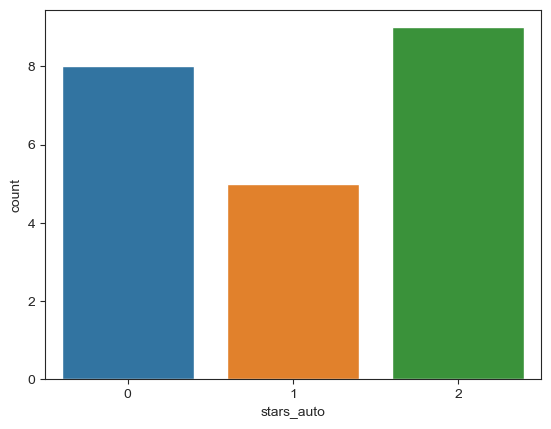

In [125]:

sns.countplot(dfs, x="stars_auto")


In [126]:
dfs.columns

Index(['filename', 'report_url', 'timestamp', 'email', 'uploaded_at',
       'finished_at', 'fps', 'Needle holder length [m]', 'Scissors length [m]',
       'Forceps length [m]',
       ...
       'Stitch 3 duration [%]', 'Needle holder stitch 0 length [pix]',
       'Forceps stitch 0 length [pix]', 'Scissors stitch 0 length [pix]',
       'Needle holder bbox stitch 0 length [pix]',
       'Forceps bbox stitch 0 length [pix]',
       'Scissors bbox stitch 0 length [pix]',
       'Left hand bbox stitch 0 length [pix]',
       'Right hand bbox stitch 0 length [pix]', 'stars_auto'],
      dtype='object', length=454)

### Replace "," with "."

In [127]:
# find the columns where its values contain single "," and digits
dfs.columns[dfs.apply(lambda x: (x.dtype is str) and (x.str.contains(",\d").any()))]
cols = []
for col in dfs.columns:
    try:
        if (dfs[col].str.contains(",\d").any()):
            # convert , to . and change the column type to float
            dfs[col] = dfs[col].str.replace(",", ".").astype(float)
            cols.append(col)
    except:
        pass
# cols

In [128]:
# dfs

In [129]:
# print name of columns containing needle holder
# dfs.columns[dfs.columns.str.contains("Needle holder")]

In [130]:
# dfs[["Needle holder stitch 1 length [m]", "Needle holder length [m]"]]

### If there is just one stitch, put ths information into stitch 1 measurements

In [131]:
# If column containing " stitch 1" in its name has empty values, fill them with  the values from the column with the same name but withuou " stitch 1"
for col in dfs.columns[dfs.columns.str.contains(" stitch 0")]:
    dfs[col] = dfs[col].fillna(dfs[col.replace(" stitch 0", "")])

In [132]:
# dfs[["Needle holder stitch 1 length [m]", "Needle holder length [m]"]]


# Find the correlation

In [133]:
# count numeric values in columns
# dfs.drop(["filename", "stars_auto"], axis=1).apply(lambda x: x.dtype is float).sum()

df

,filename,report_url,timestamp,email,uploaded_at,finished_at,fps,Needle holder length [m],Scissors length [m],Forceps length [m],...,Stitch 3 duration [s],Stitch 3 duration [%],Needle holder stitch 0 length [pix],Forceps stitch 0 length [pix],Scissors stitch 0 length [pix],Needle holder bbox stitch 0 length [pix],Forceps bbox stitch 0 length [pix],Scissors bbox stitch 0 length [pix],Left hand bbox stitch 0 length [pix],Right hand bbox stitch 0 length [pix]
0,pigleg_test.mp4,NaN,NaN,mjirik@gapps.zcu.cz,2022-06-09 16:13:04,2022-06-17 17:40:13,29.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pigleg_test2.mp4,NaN,NaN,mjirik@gapps.zcu.cz,2022-04-01 20:37:52,2022-06-17 17:47:07,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022.03.29.-B-Voltersen-Vera-Schweinefuß-Einze...,NaN,NaN,Vera.Voltersen@med.uni-jena.de,2022-03-30 13:57:55,2022-06-17 18:07:40,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021.11.3-B-Volkers-Einzelknopfnaht_Schweinefu...,NaN,NaN,miriam.volkers@uni-jena.de,2021-11-04 13:19:23,2022-06-17 21:36:30,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Einzelknopfnaht.mp4,NaN,NaN,anke.hilger@uni-jena.de,2021-11-07 19:14:34,2022-06-17 21:36:43,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,Bad-2021_11_03_A_Noll_Alexander_Einzelknopfnah...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 09:23:34,khalatbari.sadaf@gmail.com,2022-07-07 17:08,2024-01-17 08:23,25.0,"9,503007304","0,5081350784","1,944407215",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
945,Good-03_11_2021_B_Holzmu_ller_Katharina_Einzel...,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 09:26:38,khalatbari.sadaf@gmail.com,2022-07-07 17:03,2024-01-17 08:26,25.0,"6,082319172","0,2729317353","1,19984709",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
946,Good-Einzelknopfnaht_Stoklossa.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 09:31:14,khalatbari.sadaf@gmail.com,2022-06-20 08:55,2024-01-17 08:31,25.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
947,Bad-03_11_21_B_Hopfe_Johanna_Einzelknopfnaht.mp4,http://suran.kky.zcu.cz:8000//uploader/web_rep...,2024-01-17 09:37:24,khalatbari.sadaf@gmail.com,2022-07-07 17:33,2024-01-17 08:37,25.0,"5,688298479","0,2870924548","2,515599076",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
# remove columns containing " stitch 1" in their name
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 1")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 2")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 3")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains(" stitch 4")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 1")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 2")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 3")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("Stitch 4")], axis=1)
# dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("n_stitches_by_user")], axis=1)
dfs = dfs.drop(dfs.columns[dfs.columns.str.contains("annotation_annotation_stars")], axis=1)



In [135]:
dfs.corr(numeric_only=True)["stars_auto"].abs().sort_values(ascending=False)
dfs.corr(numeric_only=True)["stars_auto"].abs().sort_values(ascending=False)["Needle holder stitch 0 length [m]"]



0.07948259410517855

In [136]:

dfs.corr(numeric_only=True)["stars_auto"].abs().sort_values(ascending=False)


stars_auto                                  1.000000
n_stitches_by_user                          0.519146
Needle holder bbox length [m]               0.426761
Scissors bbox visibility [s]                0.418577
Scissors length [m]                         0.390505
                                              ...   
Needle holder bbox stitch 0 length [pix]         NaN
Forceps bbox stitch 0 length [pix]               NaN
Scissors bbox stitch 0 length [pix]              NaN
Left hand bbox stitch 0 length [pix]             NaN
Right hand bbox stitch 0 length [pix]            NaN
Name: stars_auto, Length: 122, dtype: float64

In [137]:
# try to find the best columns to predict stars_auto
corr = dfs.corr(numeric_only=True)["stars_auto"].abs().sort_values(ascending=False).head(7)
# corr = corr[corr.index != "stars_auto"] 

corr

stars_auto                          1.000000
n_stitches_by_user                  0.519146
Needle holder bbox length [m]       0.426761
Scissors bbox visibility [s]        0.418577
Scissors length [m]                 0.390505
Stitches perpendicular score [%]    0.382204
duration_s_report                   0.369627
Name: stars_auto, dtype: float64

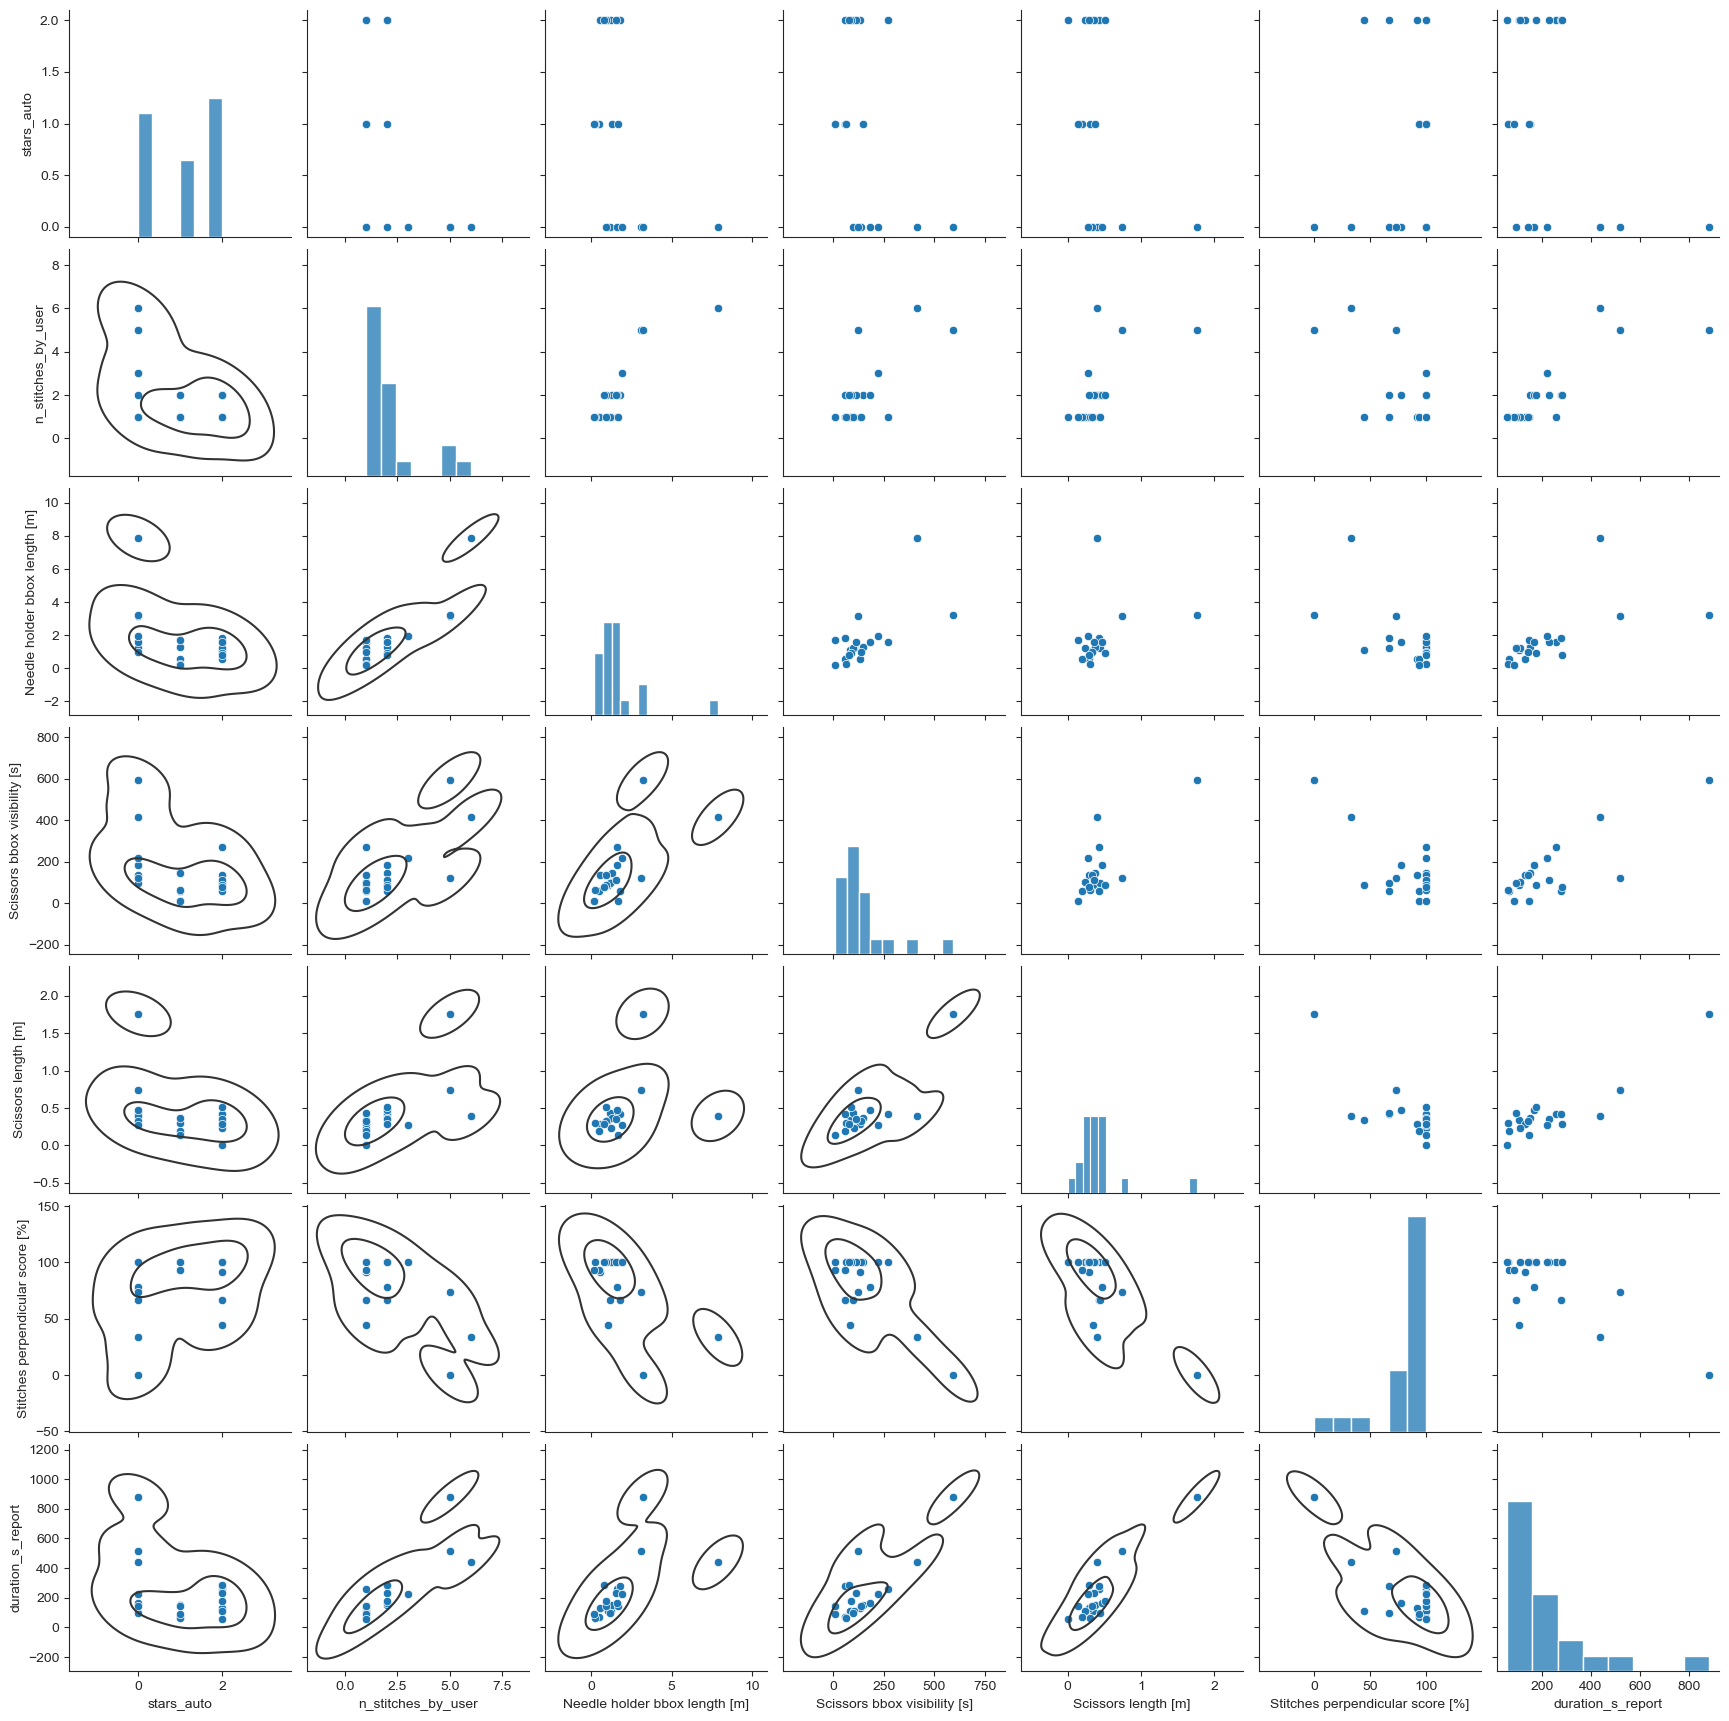

In [144]:
import seaborn as sns
g = sns.pairplot(dfs, y_vars=corr.index, 
             x_vars=corr.index,
             # x_vars=["stars_auto"]
             # hue="n_stitches_by_user"
             )
g.map_lower(sns.kdeplot, levels=3, color=".2")

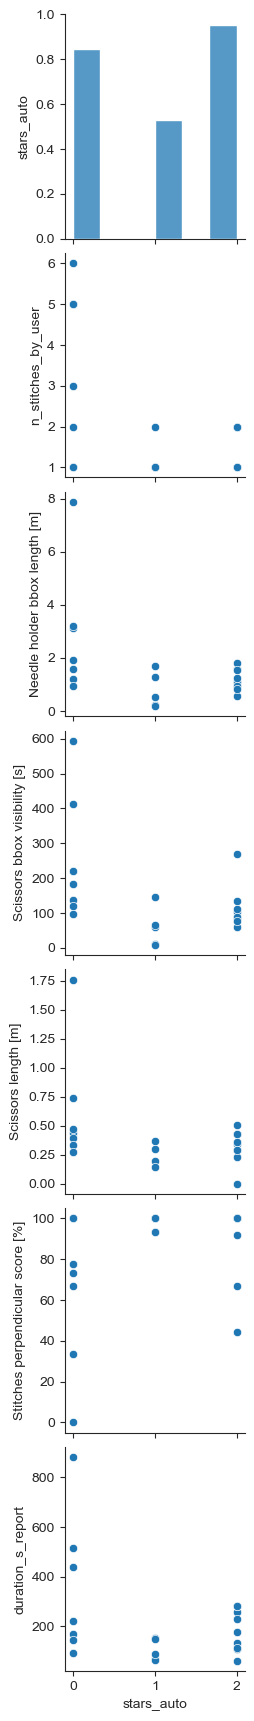

In [139]:

sns.pairplot(dfs, y_vars=corr.index,
             # x_vars=corr.index,
             x_vars=["stars_auto"]
             )


In [31]:

# corr = dfs.corr(numeric_only=True)["stars_auto"].sort_values(ascending=False).head(10)
# corr


In [42]:
# columns_to_be_removed = ["stars_auto"]
# columns = list(corr.index)
# columns = [col for col in columns if col not in columns_to_be_removed]
# columns 

# Train predictor

In [106]:
import sklearn
# train a model to predict stars_auto
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# import SVM
from sklearn.svm import SVR
#train a model to predict stars_auto

columns = list(corr.index)

columns.append("filename")
if "stars_auto" not in columns:
    columns.append("stars_auto") 

dfsx = dfs[columns]
print(len(dfsx))
dfsx = dfsx.dropna()
print(len(dfsx))
X = dfsx[columns].drop("stars_auto", axis=1).drop("filename", axis=1)
y = dfsx["stars_auto"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = SVR()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)
# 
# X
from sklearn.neural_network import MLPClassifier
# X = [[0., 0.], [1., 1.]]
# y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


22
19


-0.16755625811483132

0.25

In [108]:
# dfsx

,stars_auto,Needle holder bbox length [m],Scissors bbox visibility [s],Scissors length [m],Stitches perpendicular score [%],duration_s_report,Right hand bbox length [m],filename
922,2,1.589949,268.933333,0.426047,100.000000,257.325297,2.557326,Bad-12_10_21__Loewe__Rebekka__Einzelknopfnaht.mp4
924,2,1.072114,85.133333,0.340322,44.444444,108.413014,2.759852,Bad-2021_11_03_A_Petersen_Insa_Einzelknopfnaht...
925,2,0.579255,133.466667,0.289062,91.666667,131.291886,0.806121,Bad-2021_11_03_A_Spitze_Vanessa_Einzelknopfnah...
926,2,1.230654,103.666667,0.230395,100.000000,109.984839,1.620004,Bad-2021_11_03_B_V_lz__Ann_Sophie_Einzelknopfn...
927,2,1.795589,58.466667,0.426033,66.666667,280.195177,5.420261,Bad-2021_11_3_A_Brodersen___nne_Einzelknopfnah...
928,0,1.189138,96.000000,0.438470,66.666667,93.621097,2.319931,Good-2021_10_27_B_Etzel_Peter_Einzelknopfnaht_...
930,1,0.530351,59.466667,0.196998,93.333333,68.207113,1.222764,Medium-2021_10_12_B_Westermann_Lammers_Johanna...
931,1,0.228311,64.800000,0.301583,100.000000,62.171284,1.263741,Medium-2021_11_03_A_Tengler_Sophie_Einzelknopf...
933,1,1.295474,146.466667,0.368854,100.000000,150.856321,4.968225,Medium-2021_11_03_A_Seifert_Johanna_Einzelknop...
934,0,7.869666,413.533333,0.395279,33.333333,438.518514,11.798714,Good-2021_11_17_A_Gramlich_Judith_Stresstest_E...


## Score

In [147]:
clf.score(X_test, y_test)

0.25

In [148]:
clf.score(X_train, y_train)

0.8

## Check the předictions

In [149]:
y_test

922    2
928    0
939    0
924    2
Name: stars_auto, dtype: int32

In [150]:
y_pred = clf.predict(X_test)
y_pred

array([0, 2, 0, 0])

In [113]:
clf.predict(X_train)


array([0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1])

In [114]:
y_train

933    1
945    0
926    2
942    2
944    2
947    2
925    2
934    0
948    0
927    2
940    0
931    1
938    1
943    0
930    1
Name: stars_auto, dtype: int32

In [117]:

# sns.histplot(dfs, x="n_stitches_by_user")
dfs.columns

Index(['filename', 'report_url', 'timestamp', 'email', 'uploaded_at',
       'finished_at', 'fps', 'Needle holder length [m]', 'Scissors length [m]',
       'Forceps length [m]',
       ...
       'Scissors stitch 0 area presence [%]',
       'Needle holder stitch 0 length [pix]', 'Forceps stitch 0 length [pix]',
       'Scissors stitch 0 length [pix]',
       'Needle holder bbox stitch 0 length [pix]',
       'Forceps bbox stitch 0 length [pix]',
       'Scissors bbox stitch 0 length [pix]',
       'Left hand bbox stitch 0 length [pix]',
       'Right hand bbox stitch 0 length [pix]', 'stars_auto'],
      dtype='object', length=218)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

816    2
842    0
840    0
822    2
Name: stars_auto, dtype: int32

<AxesSubplot: xlabel='n_stitches_by_user', ylabel='Count'>

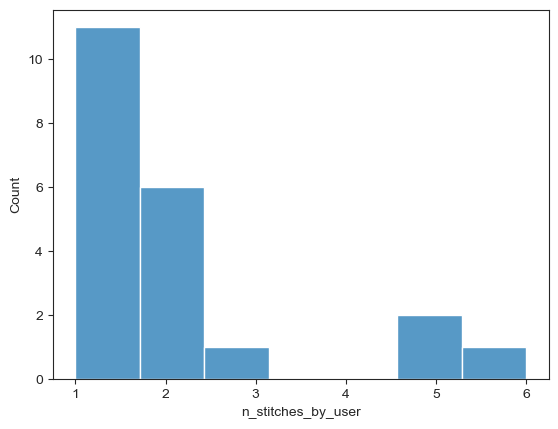

In [146]:
sns.histplot(dfs, x="n_stitches_by_user", 
             # hue="stars_auto"
             )